In [1]:
# Imports
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_excel(r'C:\Users\Kavya\OneDrive\Documents\DSA_internship\influencer_data.xlsx')

In [3]:
data.head(10)

channelId                               title  \
0  UCR6H7VWfgscnYHpRAMLWbKA            Farming Tech Mayur Patel   
1  UCeoRAN5sr02w8_9aFWxIM4g  Tech Travel Eat by Sujith Bhakthan   
2  UCMiJRAwDNSNzuYeN2uWa0pA                      Mrwhosetheboss   
3  UCJ7c1q_0KXilw_jgkeLG8pg                      Techbrokannada   
4  UC9XWJ3iy4FO6_hQbgGFPcfg                     Mau Lozano Tech   
5  UCXUJJNoP1QupwsYIWFXmsZg                         Tech Burner   
6  UCBW8ENk_9sp13G42hNly_sg                      Tech Influence   
7  UCV0qA-eDDICsRR9rPcnG7tw                           Joma Tech   
8  UCggXQcy57bwxUeZI1LB8DCw               Tech Is The New Black   
9  UCS261lQDXjMvc8Jck-2CQEg                        Gyan Therapy   

                                         description  \
0  @FarmingTechMayurPatel¬†\n#FarmingTech\n‚û°Ô∏è‡§ñ‡•á‡§§‡•Ä‡§¨...   
1  Traveler, Influencer & Food Lover\nContact: ad...   
2  Let's become the Greatest Tech Community on th...   
3  Technology, Smartphone Reviews , Unboxing Gadg...   
4  Smartphones, Unboxings, AI, Gadgets \nüìçCalifor...   
5                                        Subscribe üî•   
6            I‚Äôm Andy, a Tech Influencer #ShareASale   
7  I talk about life in Silicon Valley and at big...   
8  We are the #1 tech business and tech career vi...   
9  We present tech products in simple & easy-to-u...   

                   publishedAt  subscriberCount   viewCount  videoCount  \
0         2017-01-01T10:14:18Z           429000    35881172         343   
1         2016-08-01T16:13:49Z          2300000   803219530        2454   
2         2011-04-20T12:10:24Z         21800000  7830277165        1852   
3         2019-04-05T13:35:11Z           117000    12541442        1553   
4  2021-10-08T06:36:08.402086Z           555000   237325858        1312   
5         2014-09-26T18:24:03Z         12500000  2421879962        1525   
6         2011-09-30T22:44:36Z            16500    11208705        3202   
7         2016-08-31T22:22:07Z          2350000   193362459          89   
8         2010-03-09T19:56:56Z           160000    11904664        1402   
9         2018-08-05T18:58:33Z          3960000  1292642688        1568   

   accountAgeDays  avgLikes  avgComments  EngagementRate  PostFrequency  \
0          3218.0       252           21          0.0006       0.106588   
1          3371.0      2695          245          0.0013       0.727974   
2          5301.0     61953         1802          0.0029       0.349368   
3          2394.0       663           27          0.0059       0.648705   
4          1480.0      1340           21          0.0025       0.886486   
5          4049.0     61960         1283          0.0051       0.376636   
6          5141.0       159           24          0.0111       0.622836   
7          3344.0     94881         2577          0.0415       0.026615   
8          5711.0        10            0          0.0001       0.245491   
9          2640.0    102778         2049          0.0265       0.593939   

             query  
0  tech influencer  
1  tech influencer  
2  tech influencer  
3  tech influencer  
4  tech influencer  
5  tech influencer  
6  tech influencer  
7  tech influencer  
8  tech influencer  
9  tech influencer

In [4]:
data.shape

(4566, 13)

In [5]:
data.columns.tolist()

['channelId',
 'title',
 'description',
 'publishedAt',
 'subscriberCount',
 'viewCount',
 'videoCount',
 'accountAgeDays',
 'avgLikes',
 'avgComments',
 'EngagementRate',
 'PostFrequency',
 'query']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4566 entries, 0 to 4565
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   channelId        4566 non-null   object 
 1   title            4566 non-null   object 
 2   description      4497 non-null   object 
 3   publishedAt      4566 non-null   object 
 4   subscriberCount  4566 non-null   int64  
 5   viewCount        4566 non-null   int64  
 6   videoCount       4566 non-null   int64  
 7   accountAgeDays   4566 non-null   float64
 8   avgLikes         4566 non-null   int64  
 9   avgComments      4566 non-null   int64  
 10  EngagementRate   4566 non-null   float64
 11  PostFrequency    4564 non-null   float64
 12  query            4566 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 463.9+ KB


In [7]:
data.describe()

subscriberCount     viewCount    videoCount  accountAgeDays  \
count     4.566000e+03  4.566000e+03   4566.000000     4566.000000   
mean      2.117218e+06  6.604313e+08    824.441743     3161.859199   
std       1.260336e+07  3.252216e+09   2123.534421     1637.928471   
min       5.000000e+03  0.000000e+00      0.000000        0.000000   
25%       2.100000e+04  2.825804e+06    184.000000     1906.000000   
50%       1.600000e+05  2.641302e+07    431.000000     3115.000000   
75%       1.140000e+06  2.368313e+08    930.250000     4390.000000   
max       4.480000e+08  9.885257e+10  61366.000000     7307.000000   

           avgLikes    avgComments  EngagementRate  PostFrequency  
count  4.566000e+03    4566.000000     4566.000000    4564.000000  
mean   1.593438e+04     699.141700        0.017485       0.743716  
std    9.500104e+04    6235.446836        0.200637      27.974634  
min    0.000000e+00       0.000000        0.000000       0.000000  
25%    3.200000e+01       2.000000        0.000700       0.069795  
50%    4.035000e+02      23.000000        0.003000       0.159801  
75%    3.593250e+03     160.750000        0.010600       0.348966  
max    2.102047e+06  202771.000000        8.928600    1889.411765

In [8]:
# Checking for null values
data.isnull().sum()

channelId           0
title               0
description        69
publishedAt         0
subscriberCount     0
viewCount           0
videoCount          0
accountAgeDays      0
avgLikes            0
avgComments         0
EngagementRate      0
PostFrequency       2
query               0
dtype: int64

In [9]:
# Removing null values, duplicates, unecessary features
data = data.drop_duplicates()
data = data.dropna()
data = data.drop(['channelId', 'description', 'publishedAt','title'], axis=1)

In [10]:
data.head(5)

subscriberCount   viewCount  videoCount  accountAgeDays  avgLikes  \
0           429000    35881172         343          3218.0       252   
1          2300000   803219530        2454          3371.0      2695   
2         21800000  7830277165        1852          5301.0     61953   
3           117000    12541442        1553          2394.0       663   
4           555000   237325858        1312          1480.0      1340   

   avgComments  EngagementRate  PostFrequency            query  
0           21          0.0006       0.106588  tech influencer  
1          245          0.0013       0.727974  tech influencer  
2         1802          0.0029       0.349368  tech influencer  
3           27          0.0059       0.648705  tech influencer  
4           21          0.0025       0.886486  tech influencer

In [11]:
data.shape

(3398, 9)

In [12]:
data.isnull().sum()

subscriberCount    0
viewCount          0
videoCount         0
accountAgeDays     0
avgLikes           0
avgComments        0
EngagementRate     0
PostFrequency      0
query              0
dtype: int64

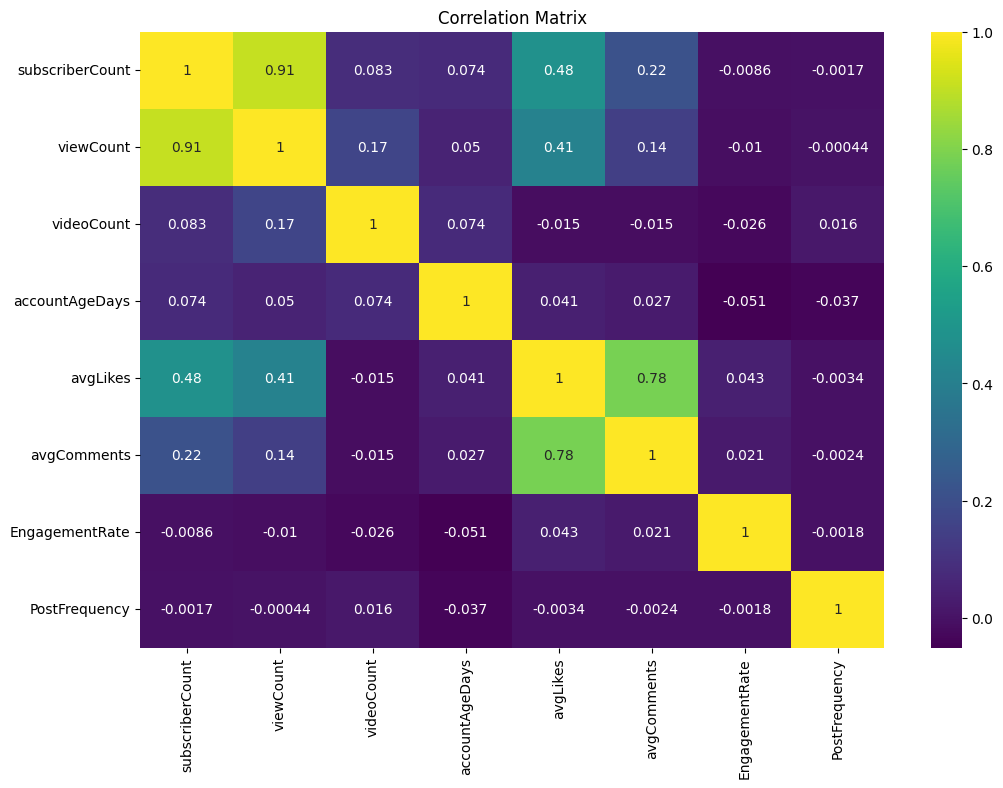

In [13]:
# Correlation heat map
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

In [14]:

num_data = data.select_dtypes(include = "number")
cat_data = data.select_dtypes(include = "object")

# Identify categorical and numerical columns
num_cols = num_data.columns.tolist()
cat_cols = cat_data.columns.tolist()

print("numerical columns: ", num_cols)
print("categorical columns: ",cat_cols)

numerical columns:  ['subscriberCount', 'viewCount', 'videoCount', 'accountAgeDays', 'avgLikes', 'avgComments', 'EngagementRate', 'PostFrequency']
categorical columns:  ['query']


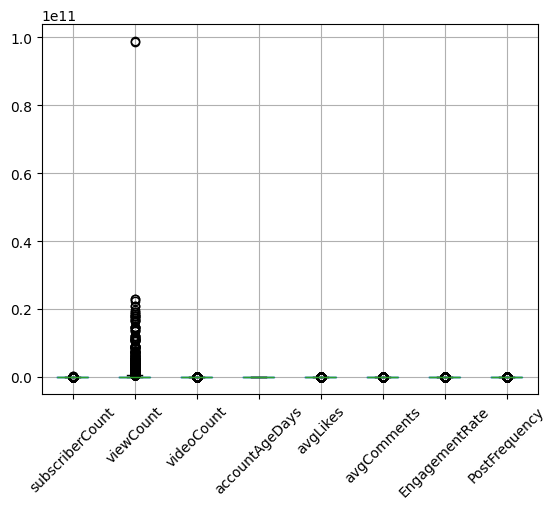

In [15]:
# Perform an outlier detection analysis on numerical variables (e.g., using the IQR method).
num_data.boxplot()
plt.xticks(rotation=45)
plt.show()

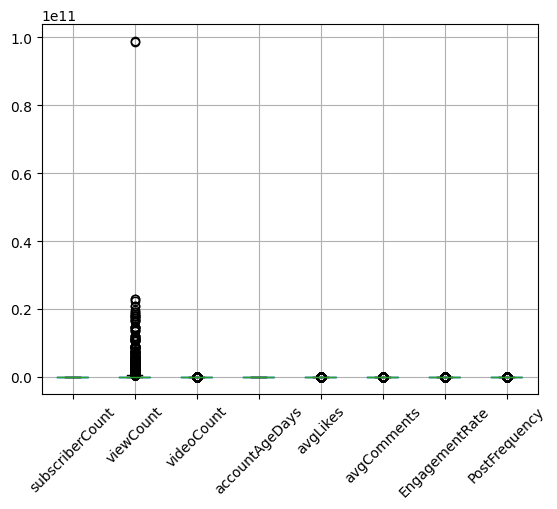

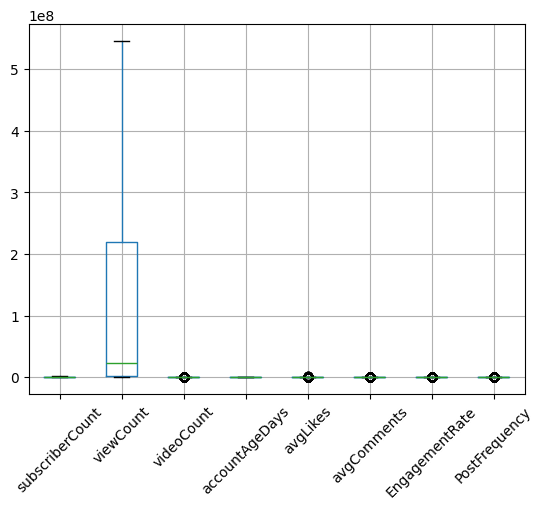

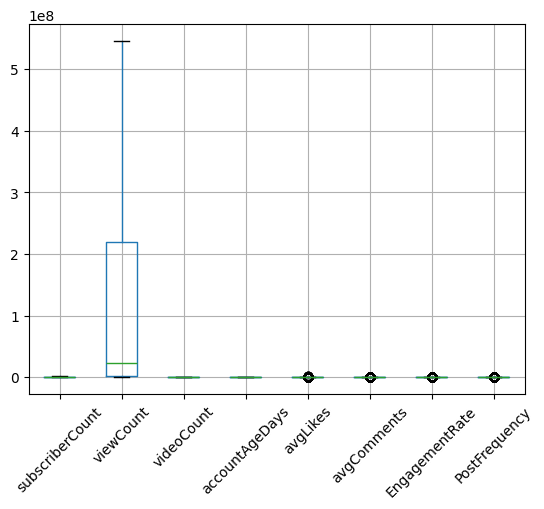

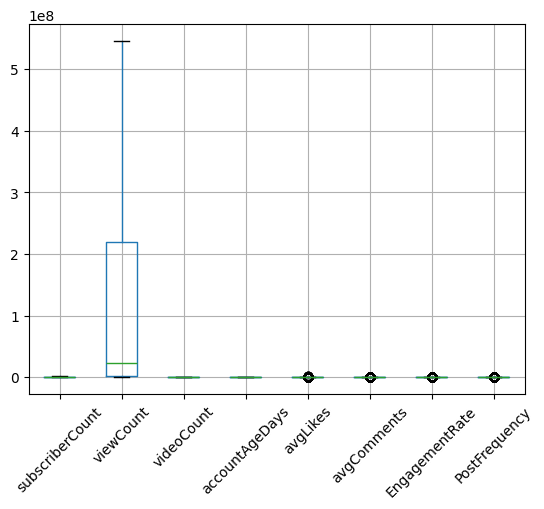

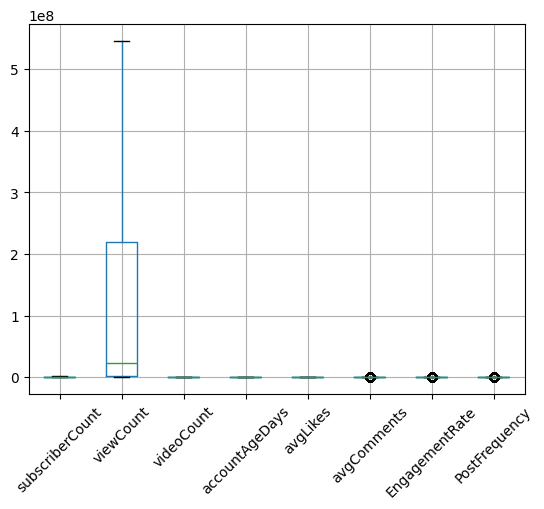

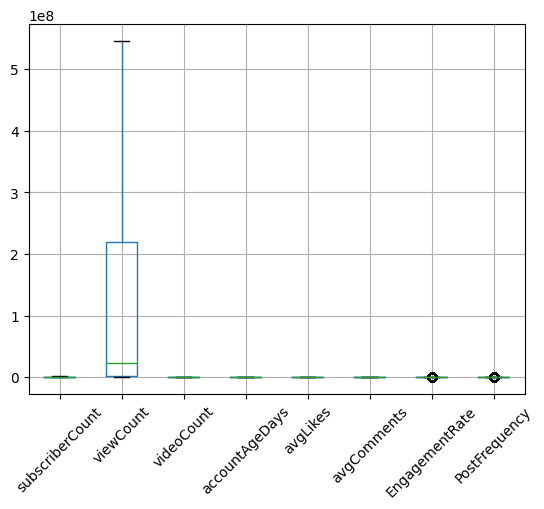

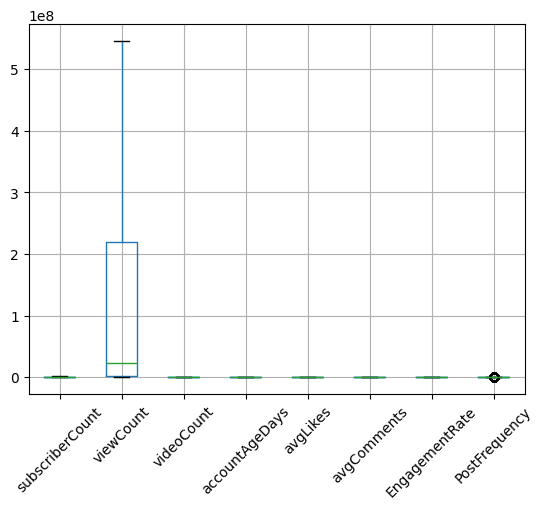

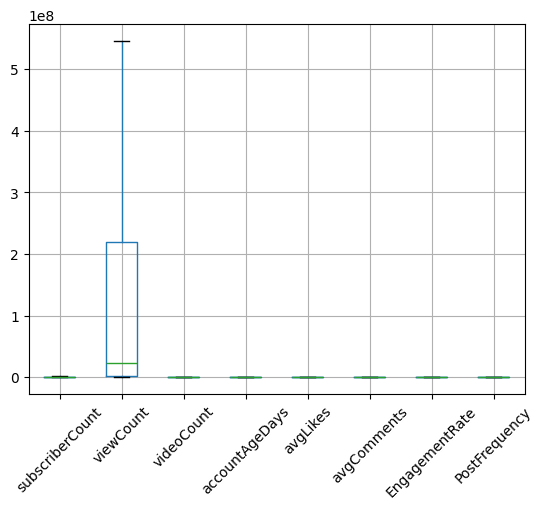

In [16]:
# Remove outliers from these features if they are not representative of typical house prices.

def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data[column_name] = data[column_name].clip(upper = upper_bound)
    data[column_name] = data[column_name].clip(lower = lower_bound)
    return data[column_name]




for col in num_cols:
      num_data[col] = remove_outliers(num_data, col)
      num_data.boxplot()
      plt.xticks(rotation=45)
      plt.show()

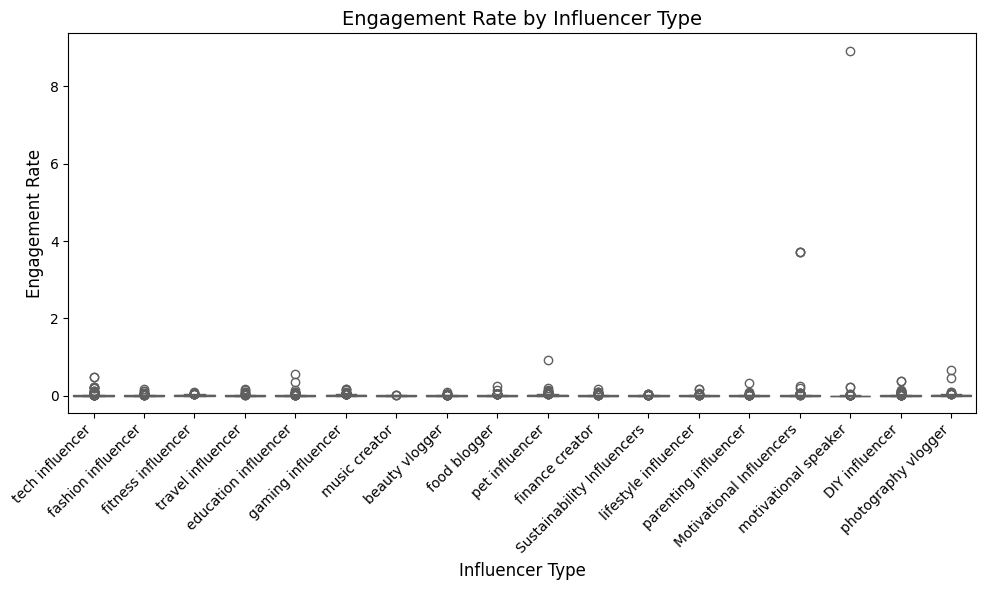

In [17]:
# Distribution of Engagement Rate across different influencer types
plt.figure(figsize=(10,6))
sns.boxplot(
    x='query', 
    y='EngagementRate', 
    hue='query', 
    data=data, 
    palette='Set3', 
    legend=False
)

plt.title('Engagement Rate by Influencer Type', fontsize=14)
plt.xlabel('Influencer Type', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

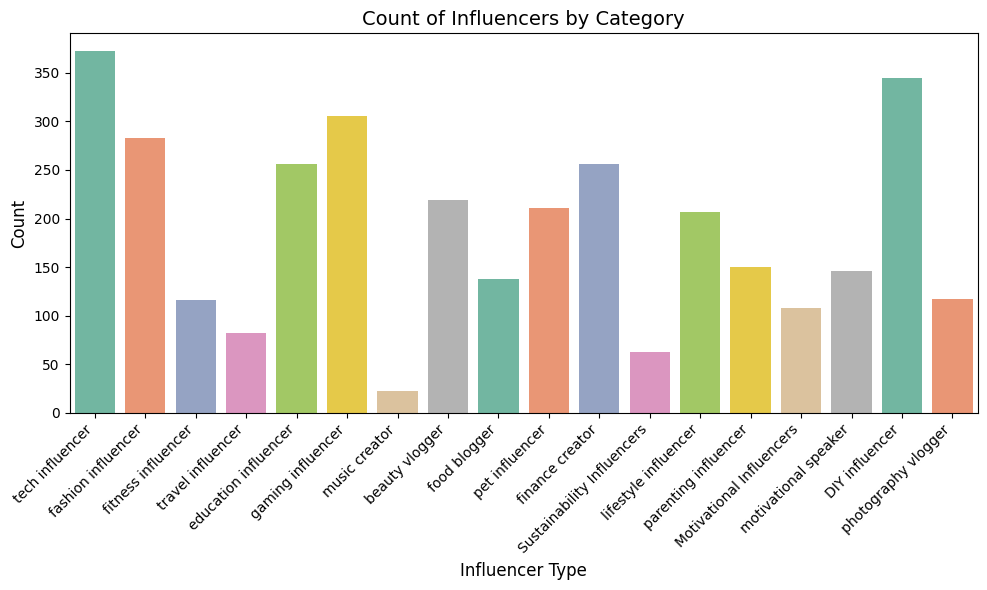

In [18]:
# Distribution of influencer counts across different categories
plt.figure(figsize=(10,6))
sns.countplot(x='query', hue='query', data=data, palette='Set2', legend=False)

plt.title('Count of Influencers by Category', fontsize=14)
plt.xlabel('Influencer Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# üîÑ Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')  # or rotation=60 for steeper angle

plt.tight_layout()
plt.show()

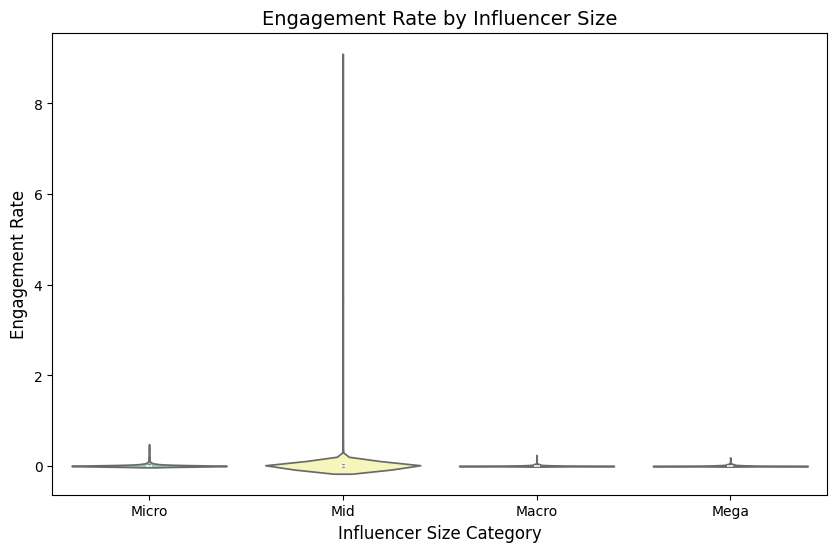

In [19]:
# Engagement Rate distribution across influencer size categories.
subgroup = pd.cut(
    data['subscriberCount'],
    bins=[0, 10000, 100000, 1000000, 10000000],
    labels=['Micro', 'Mid', 'Macro', 'Mega']
)

plt.figure(figsize=(10,6))
sns.violinplot(
    x=subgroup,          # use the temporary variable
    y=data['EngagementRate'],
    palette='Set3',
    hue=subgroup,
    legend=False
)

plt.title('Engagement Rate by Influencer Size', fontsize=14)
plt.xlabel('Influencer Size Category', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)
plt.show()


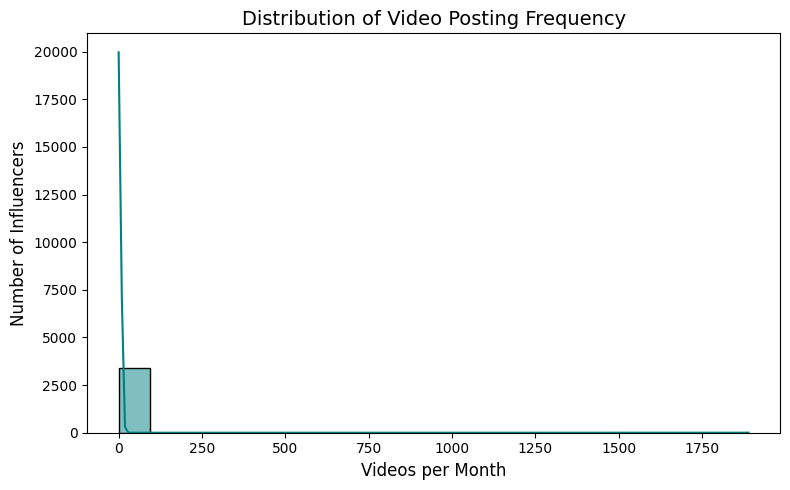

In [20]:
# Distribution of influencers‚Äô video posting frequency
plt.figure(figsize=(8,5))
sns.histplot(data['PostFrequency'], bins=20, kde=True, color='teal')

plt.title('Distribution of Video Posting Frequency', fontsize=14)
plt.xlabel('Videos per Month', fontsize=12)
plt.ylabel('Number of Influencers', fontsize=12)
plt.tight_layout()
plt.show()


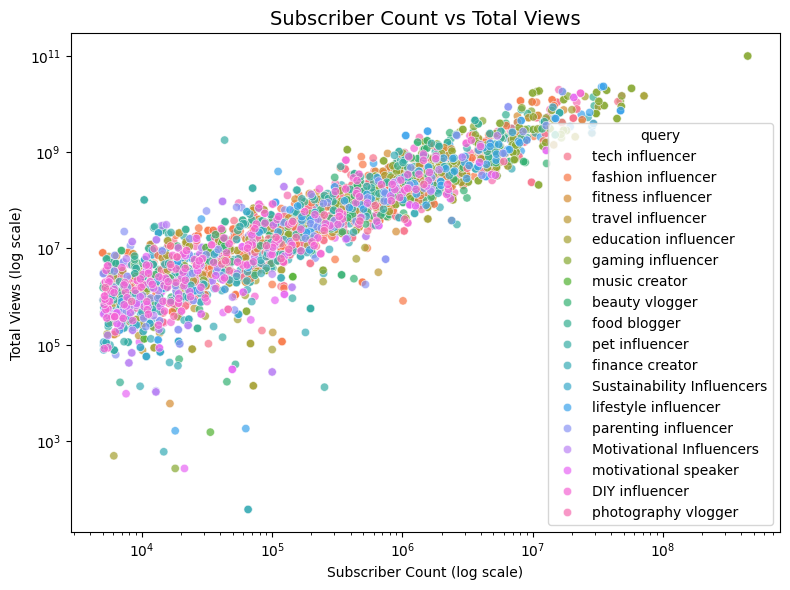

In [21]:
# Relationship between subscriber count and total views across different influencer categories.
plt.figure(figsize=(8,6))
sns.scatterplot(x='subscriberCount', y='viewCount', hue='query', data=data, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Subscriber Count vs Total Views', fontsize=14)
plt.xlabel('Subscriber Count (log scale)')
plt.ylabel('Total Views (log scale)')
plt.tight_layout()
plt.show()


In [22]:
# Scaling
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [23]:
# Encoding
cat_cols = ['query']  
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [24]:
# X = all features except EngagementRate
X = data.drop(columns=['EngagementRate'])

# y = target
y = data['EngagementRate']

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
